# Projeto 2 - Ciência dos Dados
#     Urbanização e Telefone Celulares pelo Mundo    
### Lucas Matheus Borges

Para a realização desse projeto tomei como dataset duas planilhas diferentes. A primeira trata a respeito da urbanização (em porcentagem) de diversos países pelo mundo. Já a segunda, trata-se de uma planilha com a quantidade de celulares a cada cem pessoas em vários países.



Mobile cellular subscriptions (per 100 people) = http://data.worldbank.org/indicator/IT.CEL.SETS.P2                     
Urban population (% of total) = http://data.worldbank.org/indicator/SP.URB.TOTL.IN.ZS

In [306]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from scipy import stats
from scipy.stats import beta
from scipy.stats import lognorm


print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Lucas Borges\Desktop\Ciência dos dados\Projeto 2


# Inspeção Visual das variáveis

**Urbanização**

[0, 150, 0, 0.02]

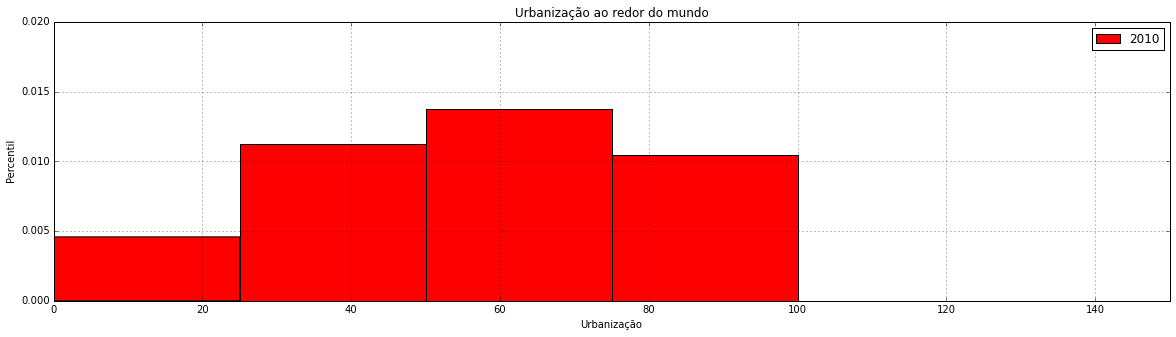

In [307]:
Urbanizacao = pd.read_excel('Urbanização.xls') # Lê a dataset
U1=Urbanizacao['2010'] # Vai ler somente a coluna 2010
fig,ax = plt.subplots(figsize=(20,5)) # Aumenta o tamanho do gráfico (lembrar de colocar ax no DataFrame-Somente nele)
pd.DataFrame.plot(kind='hist',data=U1, bins=(range(0,151,25)),normed=True,color='red',grid=2,legend=True,title="Urbanização ao redor do mundo",ax=ax) # Plotagem do histograma
plt.ylabel('Percentil') # Legenda no eixo Y
plt.xlabel('Urbanização') # Legenda no eixo X
plt.axis([0,150,0,0.02])

**Telefone Celulares**

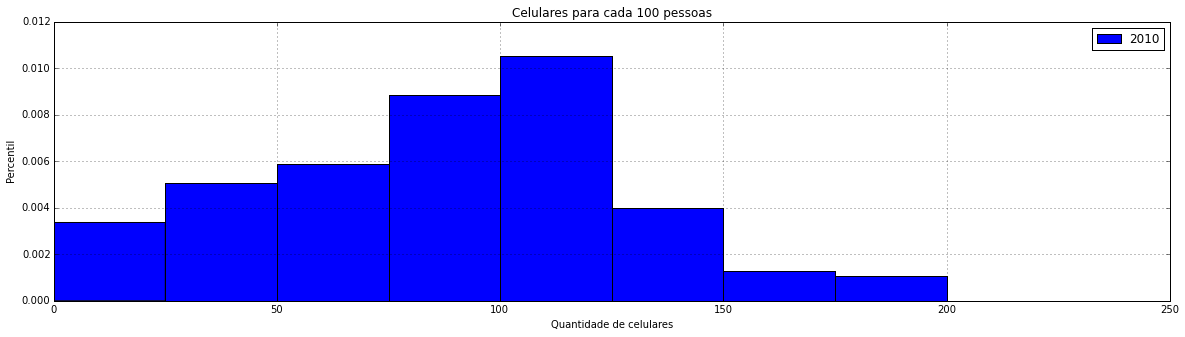

In [308]:
Celular = pd.read_excel('Celular.xls') # Lê a dataset
C1=Celular['2010'] # Vai ler somente a coluna 2010
fig,ax = plt.subplots(figsize=(20,5)) # Aumenta o tamanho do gráfico (lembrar de colocar ax no DataFrame-Somente nele)
pd.DataFrame.plot(kind='hist',data=C1, bins=(range(0,251,25)),normed=True,grid=2,legend=True,title="Celulares para cada 100 pessoas",ax=ax) # Plotagem do histograma
plt.ylabel('Percentil') # Legenda no eixo Y
plt.xlabel('Quantidade de celulares') # Legenda no eixo X

Analisando os dois histogramas gerados pode concluir-se que ambas se aproximam de uma distribuição log-normal. Além disso, tanto a distribuição beta como a gamma podem ser usadas como uma aproximação para as variáveis analisadas.

# Análise do histrograma vs. o plot teórico da distribuição

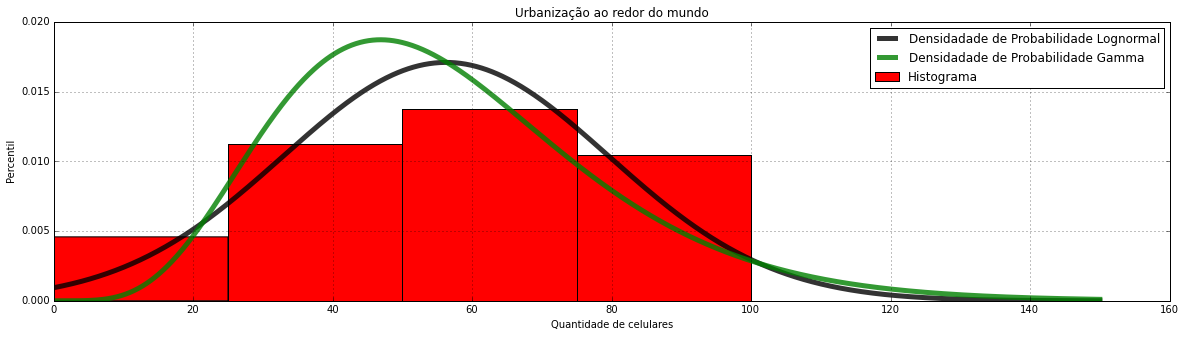

In [309]:
stddev = U1.std() # Desvio Padrão
mean = U1.mean() # Média
k_U1 = 6
theta_U1 = U1.mean()/k_U1

fra = [] # frequencia relativa acumulada
for i in range(len(U1)):
  fra.append(((i+1) - 0.5) / len(U1))

x=np.linspace(0,150,1001) # Valor inicial, Valor Final, Número de elementos

fig,ax = plt.subplots(figsize=(20,5)) # Aumenta o tamanho do gráfico (lembrar de colocar ax no DataFrame-Somente nele)

gamma = stats.gamma.pdf(x, scale=theta_U1, loc=0, a=k_U1)

pd.DataFrame.plot(kind='hist',data=U1,color='red', bins=(range(0,150,25)),normed=True,grid=2,legend=True,title="Urbanização ao redor do mundo", ax=ax) # Plotagem do histograma
plt.plot(x, stats.norm.pdf(x,loc=mean,scale=stddev),'black',alpha=0.8,lw=5) # Plota a densidade de probabilidade de distribuição 
plt.plot(x, gamma, '-', color='green', label="Gamma",alpha=0.8, lw=5) # Plota a gamma teórica
years = ["Densidadade de Probabilidade Lognormal",'Densidadade de Probabilidade Gamma', 'Histograma'] # Lista com as legendas
plt.legend(years,loc='best') # loc='best' ajeita de melhor maneira a caixa de legendas
plt.ylabel('Percentil') # Legenda no eixo Y
plt.xlabel('Quantidade de celulares') # Legenda no eixo X
#plt.plot(range(0,len(U1)), fra, '-', color='black', label="F.R.A dos dados")

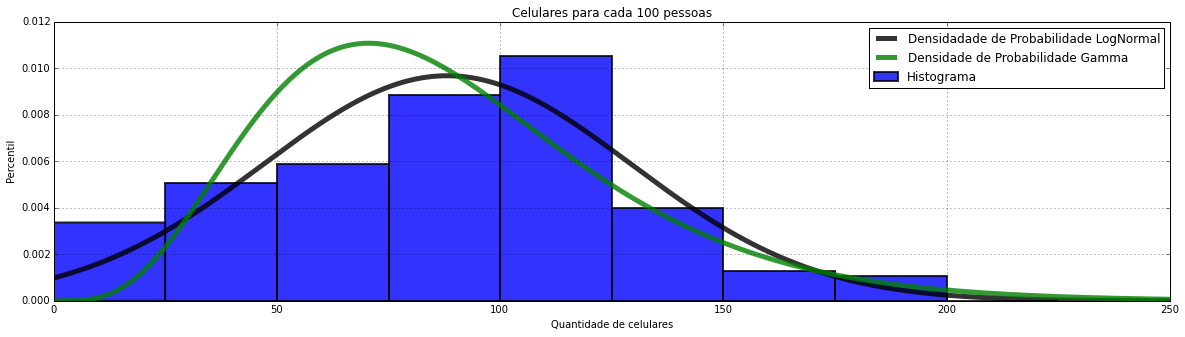

In [310]:
stddev = Celular['2010'].std() # Desvio Padrão
mean = Celular['2010'].mean() # Média

# k para a gamma é escolhido entre 1 e 2 baseado na forma do histograma e no efeito que k tem na forma da gamma
k_C1 = 5
# Estimamos theta da distribuição gamma
theta_C1 = C1.mean()/k_C1

x=np.linspace(0,250,1000) # Valor inicial, Valor Final, Número de elementos
gamma = stats.gamma.pdf(x, scale=theta_C1, loc=0, a=k_C1)


fig,ax = plt.subplots(figsize=(20,5)) # Aumenta o tamanho do gráfico (lembrar de colocar ax no DataFrame-Somente nele)

pd.DataFrame.plot(kind='hist',data=C1, bins=(range(0,250,25)),normed=True,grid=2,legend=True,lw=2,alpha=0.8,title="Celulares para cada 100 pessoas", ax=ax) # Plotagem do histograma

plt.plot(x, stats.norm.pdf(x,loc=mean,scale=stddev),'black',alpha=0.8,lw=5) # Plota a densidade de probabilidade de distribuição 
plt.plot(x, gamma, '-', color='green', label="Gamma",alpha=0.8, lw=5) # Plota a gamma teórica
years = ["Densidadade de Probabilidade LogNormal",'Densidade de Probabilidade Gamma', 'Histograma'] # Lista com as legendas
plt.legend(years,loc='best') # loc='best' ajeita de melhor maneira a caixa de legendas
plt.ylabel('Percentil') # Legenda no eixo Y
plt.xlabel('Quantidade de celulares') # Legenda no eixo X


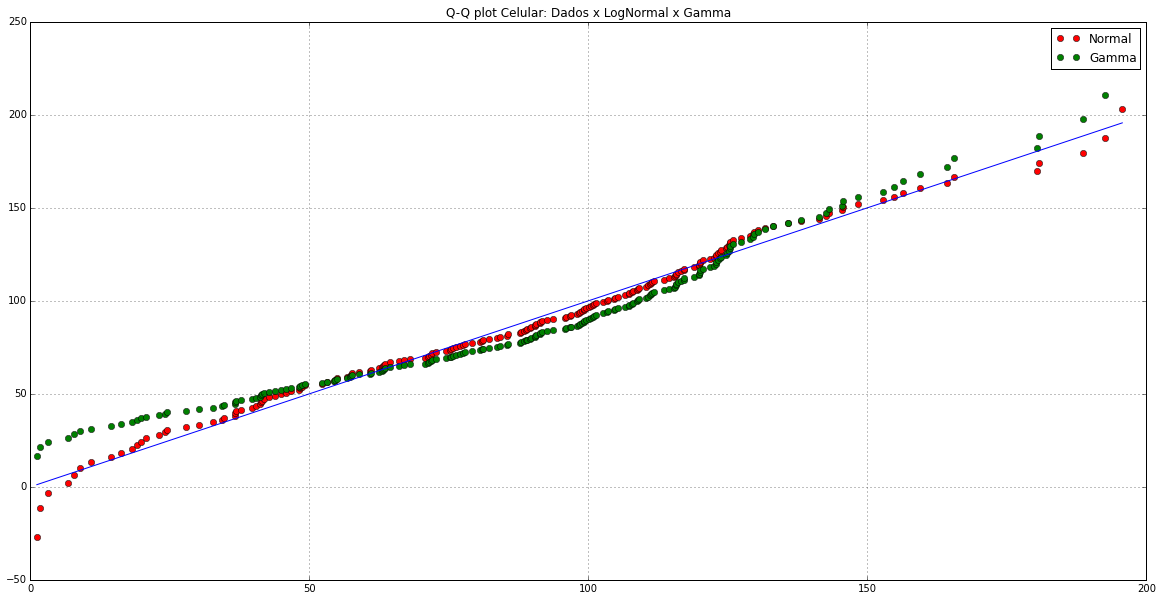

In [311]:
stddev = Celular['2010'].std() # Desvio Padrão
mean = Celular['2010'].mean() # Média]

C1= Celular['2010'].sort(inplace=False)

# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
fraC1 = [] # frequencia relativa acumulada
for i in range(len(C1)):
    acc = (i + 0.5) / len(C1)
    fraC1.append(acc) # ver Magalhães e Lima (pag. 195)

# Gera os valores dos quantis teóricos para as distribuições analisadas

q_norm = stats.norm.ppf(fraC1,loc=mean,scale=stddev)
q_gamma = stats.gamma.ppf(fraC1, scale=theta_C1, loc=0, a=k_C1)


fig = plt.figure(figsize=(20,10))

plt.title("Q-Q plot Celular: Dados x LogNormal x Gamma")

norm_plot, = plt.plot(C1, q_norm, 'o', color="red", label="Normal")
gamma_plot, = plt.plot(C1, q_gamma, 'o', color="green", label = "Gamma")

plt.legend(handles=[norm_plot, gamma_plot])

plt.plot((min(C1), max(C1)), (min(C1), max(C1)), '-')
plt.grid()


#for i in range(len(C)):
 #   plt.plot((C[i], C[i]), (q_norm[i], C[i]), '-', color='red', alpha=0.3  )
    



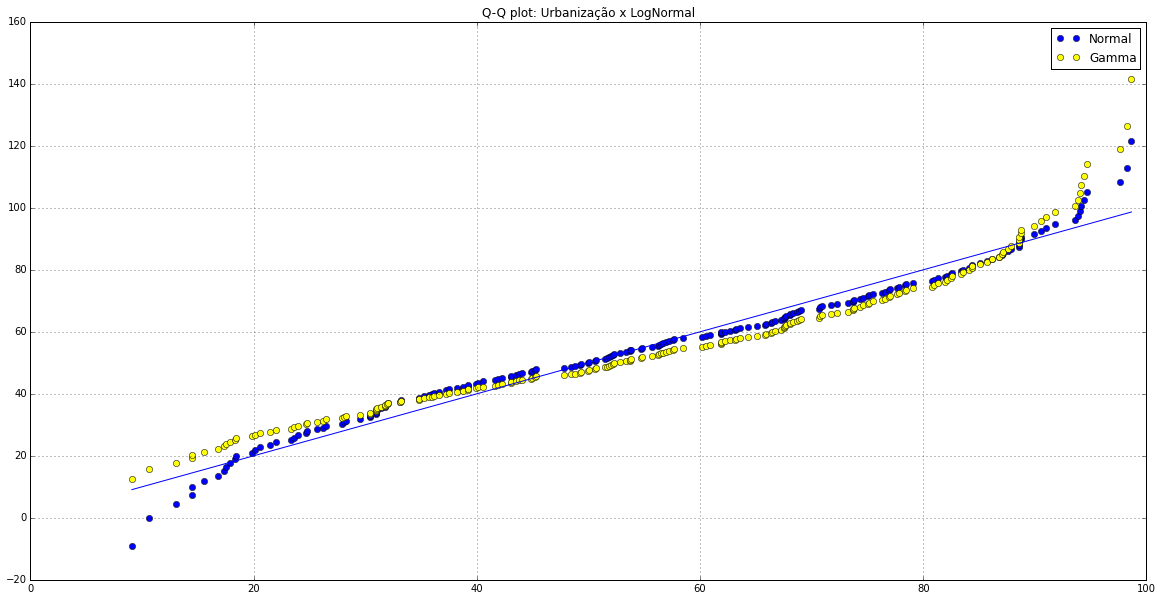

In [312]:
# dados ordenados e quantis teóricos - QQplot

stddev = Urbanizacao['2010'].std() # Desvio Padrão
mean = Urbanizacao['2010'].mean() # Média]

U1= Urbanizacao['2010'].sort(inplace=False)

# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
fraU1 = [] # frequencia relativa acumulada
for i in range(len(U1)):
    acc = (i + 0.5) / len(U1)
    fraU1.append(acc) # ver Magalhães e Lima (pag. 195)

# Gera os valores dos quantis teóricos para as distribuições analisadas

q_norm = stats.norm.ppf(fraU1,loc=mean,scale=stddev)
q_gamma = stats.gamma.ppf(fraU1, scale=theta_U1, loc=0, a=k_U1)


fig = plt.figure(figsize=(20,10))

plt.title("Q-Q plot: Urbanização x LogNormal")

norm_plot, = plt.plot(U1, q_norm, 'o', color="blue", label="Normal")
gamma_plot, = plt.plot(U1, q_gamma, 'o', color="yellow", label = "Gamma")

plt.legend(handles=[norm_plot, gamma_plot])

plt.plot((min(U1), max(U1)), (min(U1), max(U1)), '-')
plt.grid()


#for i in range(len(U1)):
  #  plt.plot((U1[i], U1[i]), (q_norm[i], U1[i]), '-', color='red', alpha=0.3  )
    
    

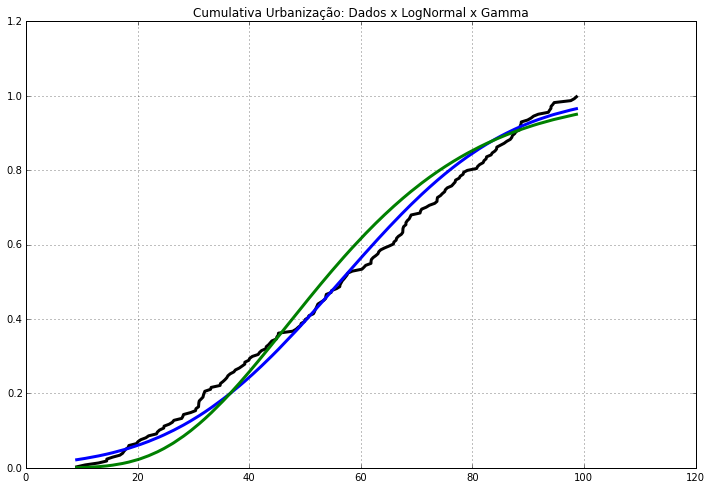

In [313]:
cdf_norm = stats.norm.cdf(U1,loc=mean,scale=stddev)
cdf_gamma = stats.gamma.cdf(U1, scale=theta_U1, loc=0, a=k_U1)

fig = plt.figure(figsize=(12,8))
plt.axis([0,120,0,1.2])

plt.title("Cumulativa Urbanização: Dados x LogNormal x Gamma")

dados_fra_plot, = plt.plot(U1, fraU1, '-', color='black', label="F.R.A dos dados", lw=3)
cdf_norm,   = plt.plot(U1, cdf_norm, '-', color='blue', label = "Cumulativa da exponencial",lw=3)
cdf_gamma_plot, = plt.plot(U1, cdf_gamma, '-', color='green', label = "Cumulativa da distribuição Gamma",lw=3)

#plt.legend(handles=[dados_fra_plot, cdf_exp_plot, cdf_gamma_plot])


#for i in range(len(tempos)):
  #  plt.plot((tempos[i], tempos[i]), (fra[i], cdf_exponencial[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
#plt.plot((tempos[i], tempos[i]), (fra[i], cdf_gamma[i]), '--', color="green", alpha=0.3)
plt.grid()    

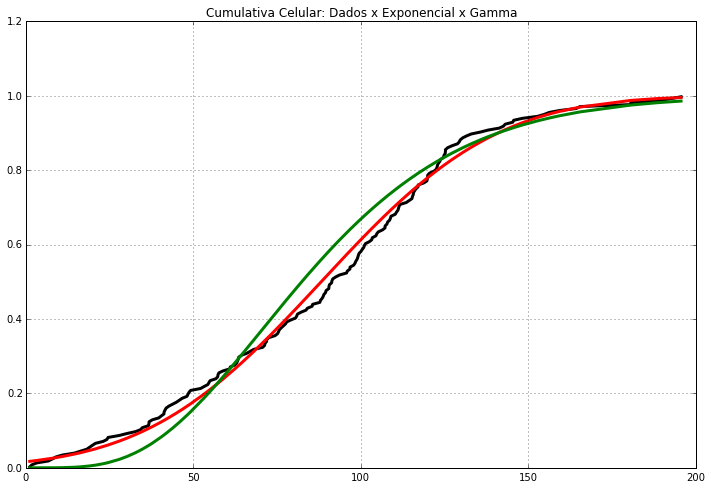

In [314]:
stddev = Celular['2010'].std() # Desvio Padrão
mean = Celular['2010'].mean() # Média]

cdf_norm = stats.norm.cdf(C1,loc=mean,scale=stddev)
cdf_gamma = stats.gamma.cdf(C1, scale=theta_C1, loc=0, a=k_C1)

fig = plt.figure(figsize=(12,8))
plt.axis([0,200,0,1.2])

plt.title("Cumulativa Celular: Dados x Exponencial x Gamma")

dados_fra_plot, = plt.plot(C1, fraC1, '-', color='black', label="F.R.A dos dados", lw=3)
cdf_norm,   = plt.plot(C1, cdf_norm, '-', color='red', label = "Cumulativa da exponencial",lw=3)
cdf_gamma_plot, = plt.plot(C1, cdf_gamma, '-', color='green', label = "Cumulativa da distribuição Gamma", lw=3)

#plt.legend(handles=[dados_fra_plot, cdf_exp_plot, cdf_gamma_plot])


#for i in range(len(C1+1)):
   # plt.plot((C1[i], C1[i]), (fra[i], cdf_norm[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
    #plt.plot((tempos[i], tempos[i]), (fra[i], cdf_gamma[i]), '--', color="green", alpha=0.3)
plt.grid()   

# Testes de aderência que usam a diferença entre quantis

**Para celulares**

In [315]:
def erro_quadratico(fra_dados, quantil_teorico):
    """ Calcula o quadrado das diferenças entre duas listas de mesmo tamanho"""
    eq = 0
    for i in range(len(fra_dados)):
        dif_quad = (fra_dados[i] - quantil_teorico[i])**2
        eq = eq + dif_quad
    return eq

erro_quadratico_normal = erro_quadratico(C1, q_norm)
erro_quadratico_gamma = erro_quadratico(C1, q_gamma)

print("Erro quadratico da exponencial :", erro_quadratico_normal)
print("Erro quadratico da gamma :", erro_quadratico_gamma)

Erro quadratico da exponencial : 673160.199303
Erro quadratico da gamma : 667101.55116


In [316]:
eqm_norm = erro_quadratico_normal/len(C1)
eqm_gamma = erro_quadratico_gamma/len(C1)

print("Erro quadratico médio da exponencial :", eqm_norm)
print("Erro quadratico médio da gamma :", eqm_gamma)

Erro quadratico médio da exponencial : 3542.94841739
Erro quadratico médio da gamma : 3511.06079558


In [317]:
def soma_diferencas(fra_dados, quantil_teorico):
    """ Calcula o quadrado das diferenças entre duas listas de mesmo tamanho"""
    eq = 0
    for i in range(len(fra_dados)):
        dif_quad = abs(fra_dados[i] - quantil_teorico[i])
        eq = eq + dif_quad
    return eq

soma_diferenças_normal = soma_diferencas(C1, q_norm)
soma_diferenças_gamma = soma_diferencas(C1, q_gamma)

print("Soma de diferenças da exponencial :", soma_diferenças_normal)
print("Soma de diferenças da gamma :", soma_diferenças_gamma)

Soma de diferenças da exponencial : 9411.8254099
Soma de diferenças da gamma : 9437.04528108


**Para Urbanização**

In [318]:
def erro_quadratico(fra_dados, quantil_teorico):
    """ Calcula o quadrado das diferenças entre duas listas de mesmo tamanho"""
    eq = 0
    for i in range(len(fra_dados)):
        dif_quad = (fra_dados[i] - quantil_teorico[i])**2
        eq = eq + dif_quad
    return eq

erro_quadratico_normal = erro_quadratico(U1, q_norm)
erro_quadratico_gamma = erro_quadratico(U1, q_gamma)

print("Erro quadratico da exponencial :", erro_quadratico_normal)
print("Erro quadratico da gamma :", erro_quadratico_gamma)

Erro quadratico da exponencial : 247630.86964
Erro quadratico da gamma : 246129.344926


In [319]:
eqm_norm = erro_quadratico_normal/len(U1)
eqm_gamma = erro_quadratico_gamma/len(U1)

print("Erro quadratico médio da exponencial :", eqm_norm)
print("Erro quadratico médio da gamma :", eqm_gamma)

Erro quadratico médio da exponencial : 1289.74411271
Erro quadratico médio da gamma : 1281.92367149


In [320]:
def soma_diferencas(fra_dados, quantil_teorico):
    """ Calcula o quadrado das diferenças entre duas listas de mesmo tamanho"""
    eq = 0
    for i in range(len(fra_dados)):
        dif_quad = abs(fra_dados[i] - quantil_teorico[i])
        eq = eq + dif_quad
    return eq

soma_diferenças_normal = soma_diferencas(U1, q_norm)
soma_diferenças_gamma = soma_diferencas(U1, q_gamma)

print("Soma de diferenças da exponencial :", soma_diferenças_normal)
print("Soma de diferenças da gamma :", soma_diferenças_gamma)

Soma de diferenças da exponencial : 5622.86743448
Soma de diferenças da gamma : 5569.1277896


# Testes de aderência que usam a cumulativa

**Para Celulares**

In [321]:
# Erro quadrático nas CDFs

mean=C1.mean()
stddev=C1.var()

cdf_norm = stats.norm.cdf(C1,loc=mean,scale=stddev)
cdf_gamma = stats.gamma.cdf(C1, scale=theta_C1, loc=0, a=k_C1)

erro_quad_cdf_norm = sum((fraC1 - cdf_norm)**2)
erro_quad_cdf_gamma = sum((fraC1 - cdf_gamma)**2)

print("Erro quadrático da CDF da LogNormal versus F.R.A", erro_quad_cdf_norm)
print("Erro quadrático da CDF da Gamma versus F.R.A", erro_quad_cdf_gamma)

Erro quadrático da CDF da LogNormal versus F.R.A 14.8126378787
Erro quadrático da CDF da Gamma versus F.R.A 0.654657042112


In [322]:
# Diferenças absolutas
soma_difs_cdf_norm = sum(abs(fraC1 - cdf_norm))
soma_difs_cdf_gamma = sum(abs(fraC1 - cdf_gamma))

print("Erro da soma do módulo das diferenças da LogNormal versus F.R.A: {0} \nErro da soma do módulo das diferenças da gamma versus F.R.A: {1}".format(soma_difs_cdf_norm, soma_difs_cdf_gamma))

Erro da soma do módulo das diferenças da LogNormal versus F.R.A: 46.016742221654916 
Erro da soma do módulo das diferenças da gamma versus F.R.A: 9.440987819403732


** Para Urbanização **

In [323]:
# Erro quadrático nas CDFs

mean=U1.mean()
stddev=U1.var()

cdf_norm = stats.norm.cdf(U1,loc=mean,scale=stddev)
cdf_gamma = stats.gamma.cdf(U1, scale=theta_U1, loc=0, a=k_U1)

erro_quad_cdf_norm = sum((fraU1 - cdf_norm)**2)
erro_quad_cdf_gamma = sum((fraU1 - cdf_gamma)**2)

print("Erro quadrático da CDF da LogNormal versus F.R.A", erro_quad_cdf_norm)
print("Erro quadrático da CDF da Gamma versus F.R.A", erro_quad_cdf_gamma)

Erro quadrático da CDF da LogNormal versus F.R.A 14.170150102
Erro quadrático da CDF da Gamma versus F.R.A 0.575371336061


In [324]:
# Diferenças absolutas
soma_difs_cdf_norm = sum(abs(fraU1 - cdf_norm))
soma_difs_cdf_gamma = sum(abs(fraU1 - cdf_gamma))

print("Erro da soma do módulo das diferenças da LogNormal versus F.R.A: {0} \nErro da soma do módulo das diferenças da Gamma versus F.R.A: {1}".format(soma_difs_cdf_norm, soma_difs_cdf_gamma))

Erro da soma do módulo das diferenças da LogNormal versus F.R.A: 45.2060111521236 
Erro da soma do módulo das diferenças da Gamma versus F.R.A: 9.45711558955409


# Teste de aderência de Kolmogorov-Smirnov

** Para celulares **

In [325]:
# Kolmogorov-Smirnov goodness-of-fit test

cdf_norm = stats.norm.cdf(C1,loc=mean,scale=stddev) # RETIRAR DEPOIS
cdf_gamma = stats.gamma.cdf(C1, scale=theta_U1, loc=0, a=k_U1) # RETIRAR DEPOIS
    
ks_aderencia_norm = max(abs(fraC1-cdf_norm))
ks_aderencia_gamma = max(abs(fraC1-cdf_gamma))

print("Teste K-S para a normal com μ= {:4.2f} e σ²={:4.3f}: {:4.3f}\n\
Teste K-S para a gamma com scale={:4.3f}, loc=0 e a={:4.3f}: {:4.3f}  ".format(stddev,mean, ks_aderencia_norm, theta_C1, k_C1, ks_aderencia_gamma))

Teste K-S para a normal com μ= 544.97 e σ²=56.261: 0.457
Teste K-S para a gamma com scale=17.634, loc=0 e a=5.000: 0.460  


** Para Urbanização **

In [326]:
# Kolmogorov-Smirnov goodness-of-fit test

cdf_norm = stats.norm.cdf(U1,loc=mean,scale=stddev) # RETIRAR DEPOS
cdf_gamma = stats.gamma.cdf(U1, scale=theta_U1, loc=0, a=k_U1) # RETIRAR DEPOIS

ks_aderencia_norm = max(abs(fraU1-cdf_norm))
ks_aderencia_gamma = max(abs(fraU1-cdf_gamma))


print("Teste K-S para a normal com μ= {:4.2f} e σ²={:4.3f}: {:4.3f}\n\
Teste K-S para a gamma com scale={:4.3f}, loc=0 e a={:4.3f}: {:4.3f}  ".format(stddev,mean, ks_aderencia_norm, theta_C1, k_C1, ks_aderencia_gamma))

Teste K-S para a normal com μ= 544.97 e σ²=56.261: 0.466
Teste K-S para a gamma com scale=17.634, loc=0 e a=5.000: 0.101  
